In [1]:
import numpy as np

from onequtritpulsesimulator import OneQutritPulseSimulator
from processtomography import QutritProcessTomography

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Process Tomography of a gate provided in the matrix form

In [3]:
sim = OneQutritPulseSimulator()
backend = sim.get_backend()

gate = np.array([[0,1,0],[1,0,0],[0,0,1]])

qpt = QutritProcessTomography(gate=gate, backend=backend)

### Obtaining the process matrix

In [4]:
process_matrix = qpt.run()

### Plotting the the process matrix

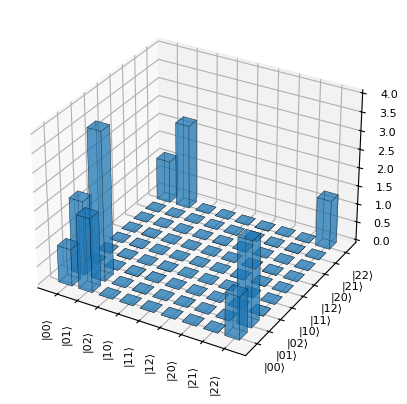

None

In [5]:
qpt.plot_chi()

## Process Tomography of a gate provided as a pulse

In [6]:
from qiskit import pulse
from simulator_parameters_1q import get_parameter

In [7]:
freq = get_parameter('freq')
amp = get_parameter('amp')
beta = get_parameter('beta')
ef_freq = get_parameter('ef_freq')
ef_amp = get_parameter('ef_amp')
ef_beta = get_parameter('ef_beta')

In [8]:
sim = OneQutritPulseSimulator()
backend = sim.get_backend()

dchan = pulse.DriveChannel(0)
achan = pulse.AcquireChannel(0)
memslot = pulse.MemorySlot(0)

In [9]:
with pulse.build('test_pulse') as test_pulse:
    pulse.set_frequency(freq, dchan)
    pulse.play(pulse.Drag(320, amp, 80, beta), dchan)
    pulse.set_frequency(ef_freq, dchan)
    pulse.play(pulse.Drag(320, (1/2)*ef_amp, 80, ef_beta), dchan)

qpt = QutritProcessTomography(gate_pulse=test_pulse, backend=backend)

### Obtaining the process matrix

In [10]:
process_matrix = qpt.run()

### Plotting the the process matrix

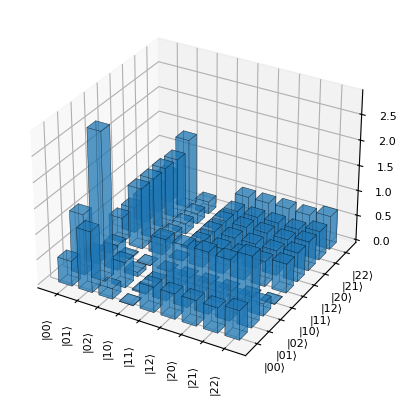

None

In [11]:
qpt.plot_chi()